# CS5014 Practical 1

150015752

28.2.2019

## Overview

The task of the practical is training and evaluation of rergession models on given dataset of 8 features and 2 targets. The features are different house parameters that might affect the target values, heating and cooling load. The heating and cooling load are continuous values and therefore the regression models are appropriate. The paper coming with the dataset also suggests classification, but since we have a limited time to finish the practical, we're only using regression models. Particularly, we're using Linear Regression and Gradient Boosting Regression. The solution offers visualisation and analysis of the data, and based on the analysis, the features are scaled and regularised. The solution describes reasoning behind chosen hyperparameters and the results obtained from the models.

In [248]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from scipy.stats import pearsonr
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

NUM_OF_REPS = 50

## Solution

### Loading and cleaning the data


We load the data using pandas library which can also store metadata such as column names. Additionally, pandas' DataFrame objects are easy to manipulate and slice.


In [98]:
dataset = pd.read_csv('ENB2012_data.csv')
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


We slice the data to feature values and target values. In this case, feature values are all columns from X1 to X8 and target values are columns Y1 and Y2.


In [99]:
X = dataset.loc[:, 'X1':'X8']
y = dataset.loc[:,'Y1':'Y2']

In [100]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [101]:
y.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


### Analysing and visualising the data

To better visualize the relation between feature and target values, we implement a function that plots a specified target column as a function of each feature column separately.


In [211]:
def plotCorr(X, y, column_names, res, y_predicts=None):
    # Plot outputs
    num_of_features = X.shape[1]
    height = num_of_features*3
    plt.subplots(figsize=(15,height))
    if type(X) == np.ndarray:
        X_vals = X
        y_vals = y
    else:
        X_vals = X.values
        y_vals = y.values

    index = 1
    for col in range(0, num_of_features):
        plt.tight_layout()
        plt.subplot(num_of_features, 2, index).set_title("Real Y" + str(res + 1) + 
                                                         " values for " + column_names[col])
        plt.scatter(X_vals[:, col], y_vals[:, res], color='black')
        index+=1

        if y_predicts is not None:
            plt.subplot(num_of_features, 2, index).set_title("Predicted Y" + str(res + 1) + 
                                                             " values for " + column_names[col])
            plt.scatter(X_vals[:, col], y_predicts[:,res], color='blue')
            index+=1
    plt.show()


#### Relation plots of feature values for heating load

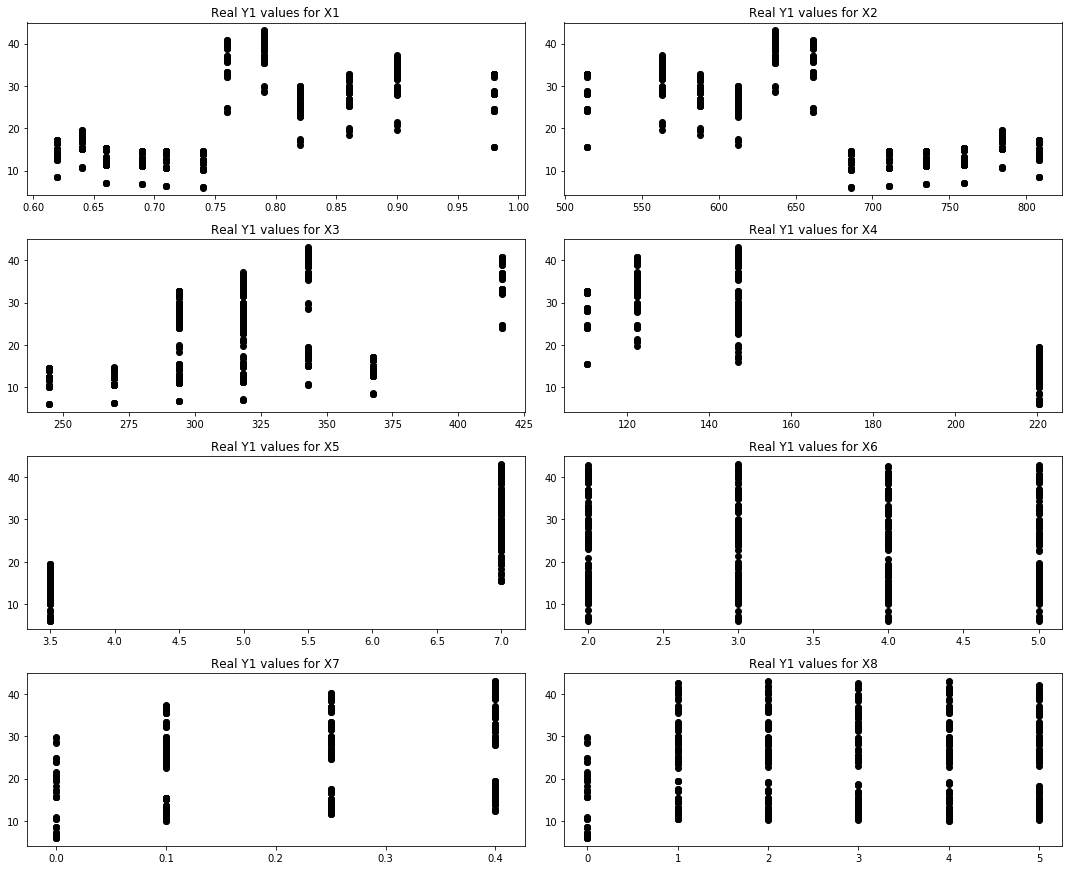

In [212]:
plotCorr(X, y, X.columns, 0)

#### Relation plots of feature values for cooling load

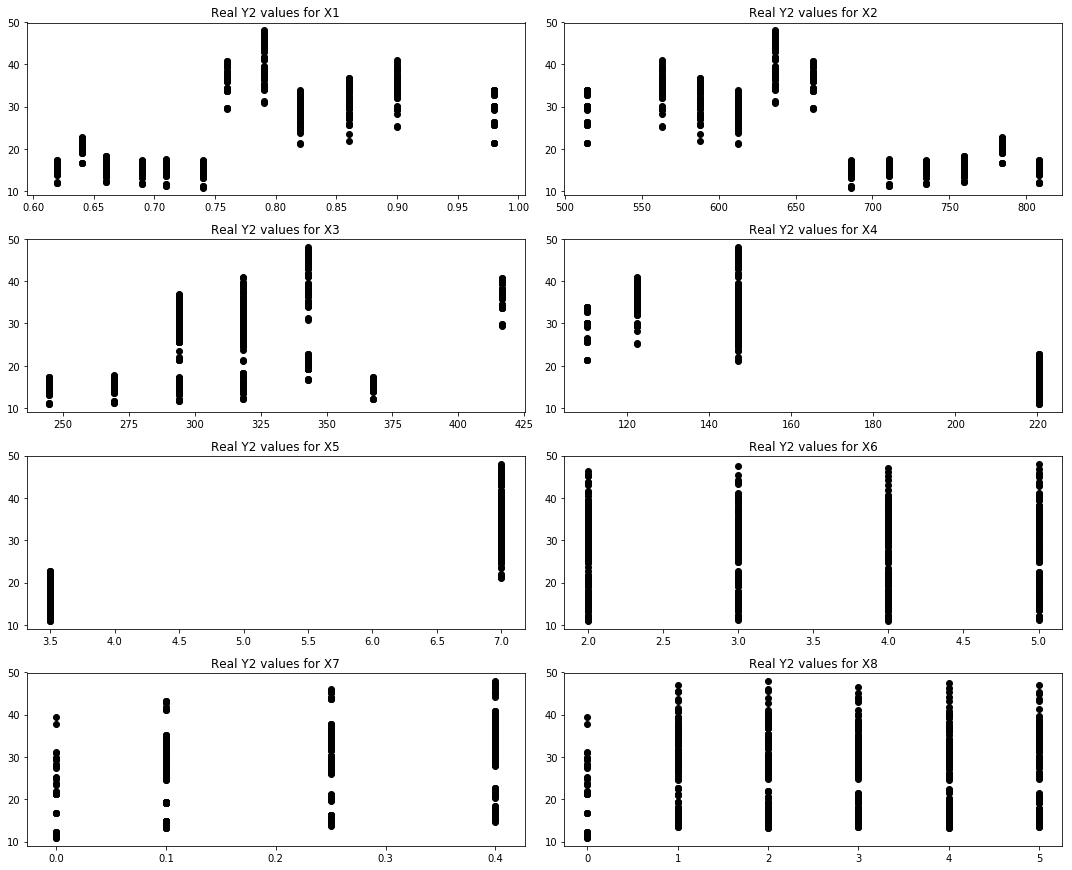

In [213]:
plotCorr(X, y, X.columns, 1)

Particularly for columns X6 and X8, that is Orientation and Glazing area distribution, we may notice that the distribution is very random. We might display the impact all the features have on HL and CL by a Pearson's correlation. Pearson's correlation is a number between -1 and 1 that indicates to what extent are 2 variables linearly related. 1 indicates total positive linear correlation, 0 no linear correlation and -1 total negative correlation. We implement a function that prints out Pearson's correlation for each feature to both HL and CL. 


In [105]:
def getPearsonCorrs(X, y):
    num_of_features = X.shape[1]
    for res in range(0,2):
        print("Pearson's correlation for all features and Y" + str(res + 1))
        for col in range(0,num_of_features):
            print(X.columns[col] + " => " + str(pearsonr(X.values[:,col], y.values[:,res])[0]))
        print('\n')

In [106]:
getPearsonCorrs(X, y)

Pearson's correlation for all features and Y1
X1 => 0.6222721790646626
X2 => -0.6581202267776216
X3 => 0.4556711568983097
X4 => -0.861828252905822
X5 => 0.8894306741007042
X6 => -0.002586533915638776
X7 => 0.2698409963206335
X8 => 0.08736759370846414


Pearson's correlation for all features and Y2
X1 => 0.6343390663353593
X2 => -0.6729989333544865
X3 => 0.42711699766713346
X4 => -0.862546603524974
X5 => 0.8957851688924501
X6 => 0.01428959757617023
X7 => 0.20750499116036222
X8 => 0.050525118805675666




As suspected, both X6 and X8 have a relatively low impact on the target values. These features may have impact on residential building in other areas, but with the dataset we're given they do not and we might create an additional dataset without these 2 columns, to test if there's any change in a regressor accuracy.


In [107]:
def plotHists(X, column_names):
    # Plot outputs
    num_of_features = X.shape[1]
    height = num_of_features*3
    plt.subplots(figsize=(15,height))
    if type(X) == np.ndarray:
        X_vals = X
    else:
        X_vals = X.values

    index = 1
    for col in range(0, num_of_features):
        plt.subplot(num_of_features, 2, index).set_title(column_names[col])
        plt.xlabel("Values")
        plt.ylabel("Frequency")
        plt.tight_layout()
        # plt.hist(num_of_features, 2, index).set_title("Real Y" + str(res + 1) + 
        #                                          " values for " + column_names[col])
        plt.hist(X_vals[:, col])
        index+=1
    plt.show()


### Preparing the inputs and choosing a suitable subset of features

We can create an additional dataset without the 2 columns we identified earlier.


In [ ]:
X_reduced = dataset[['X1','X2','X3','X4','X5','X7']]

The next step is to split the dataset to training and testing sets. We'll train on training dataset and evaluate the current model settings by k-fold cross validation. This technique is considered to be a very precise evaluation, but it is not used that often due to its computational expensiveness. The model is trained k times and tested on the hold-out set and can therefore take a while with more complex datasets. However, our dataset is actually not that large nor are the models that performance-heavy, and hence we can afford it. To get a more accurate result, we repeat this evaluation 50 times and get a mean over the results. We do not test on the testing set until we've found the optimal model with k-fold cross validation and want to evaluate the model on an unseen data.

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_reduced, y, test_size=0.2)

In [111]:
def rep_cross_val_score(model, X, y, cv, scoring, reps):
    sum = 0
    for i in range(0,reps):
        sum += cross_val_score(model, X, y, cv=cv, scoring=scoring).mean()
    return sum / reps

### Training and evaluating regression models


#### Linear Regression


With the data splitted, we can train a simple linear regression model without any additional preprocessing and evaluate it to see how well the model performs.


In [247]:
lin_reg = LinearRegression()
error = rep_cross_val_score(lin_reg, X_train, y_train, 4, "neg_mean_squared_error", NUM_OF_REPS).mean()
error

-9.17706764355141

To judge this result, we need to know how large is it relative to the target values. Therefore, we get min and max values for both target columns to see this. This might not be be the most precise way, but it only serves to demonstrate roughly rounded error of the model.

In [113]:
def printError(y, error):
    min = y.min()
    max = y.max()
    
    print("MIN")
    print(min)
    print("\nMAX")
    print(max)
    print()
    diff0 = max[0] - min[0]
    diff1 = max[1] - min[1]
    print('Y1 (max - min) = ' + str(diff0))
    print('Y2 (max - min) = ' + str(diff1))
    sqrt_error = sqrt(-error)
    print("\nRoot mean squared error relative to the spread of Y1: " +
            str(round(sqrt_error, 2)) + " / " + str(diff0) + " = " + str(round(sqrt_error / diff0, 2)))
    print("\nRoot mean squared error relative to the spread of Y2: " +
            str(round(sqrt_error, 2)) + " / " + str(diff1) + " = " + str(round(sqrt_error / diff1, 2)))


In [114]:
printError(y, error)

MIN
Y1     6.01
Y2    10.90
dtype: float64

MAX
Y1    43.10
Y2    48.03
dtype: float64

Y1 (max - min) = 37.09
Y2 (max - min) = 37.13

Root mean squared error relative to the spread of Y1: 3.09 / 37.09 = 0.08

Root mean squared error relative to the spread of Y2: 3.09 / 37.13 = 0.08


The model would have a deviation of around 3.07 which is 8% from the spread of the both target columns. Now, we can try the reduced dataset, to see if removing the 2 feature columns helps in any way.


In [240]:
lin_reg = LinearRegression()
rep_cross_val_score(lin_reg, X_red_train, y_red_train, 4, "neg_mean_squared_error", NUM_OF_REPS).mean()

-9.517020863613938

The result demonstrates that removing the columns does not make a large difference in the linear regression model, however, we might keep the reduced dataset for other models, where it might.

To improve performance and possibly an accuracy of a model we need to scale the features. The 2 main options for scaling are MinMaxScaler and StandardScaler. MinMaxScaler scales and shifts the values to range between 0 and 1, whereas StandardScaler centres the values to 0 by removing the mean and divides by the variance to achieve unit variance. StandardScaler should be applied to data which is normally distributed, and can handle outliers. However, if the data is not normally distributed, MinMaxScaler is better. The disadvantage is its sensitivity to outliers. To decide which scaler to use, we need to plot histograms to see the features' distributions.

In [116]:
def plotHists(X, column_names):
    # Plot outputs
    num_of_features = X.shape[1]
    height = num_of_features*3
    plt.subplots(figsize=(15,height))
    if type(X) == np.ndarray:
        X_vals = X
    else:
        X_vals = X.values

    index = 1
    for col in range(0, num_of_features):
        plt.subplot(num_of_features, 2, index).set_title(column_names[col])
        plt.xlabel("Values")
        plt.ylabel("Frequency")
        plt.tight_layout()
        # plt.hist(num_of_features, 2, index).set_title("Real Y" + str(res + 1) + 
        #                                          " values for " + column_names[col])
        plt.hist(X_vals[:, col])
        index+=1
    plt.show()


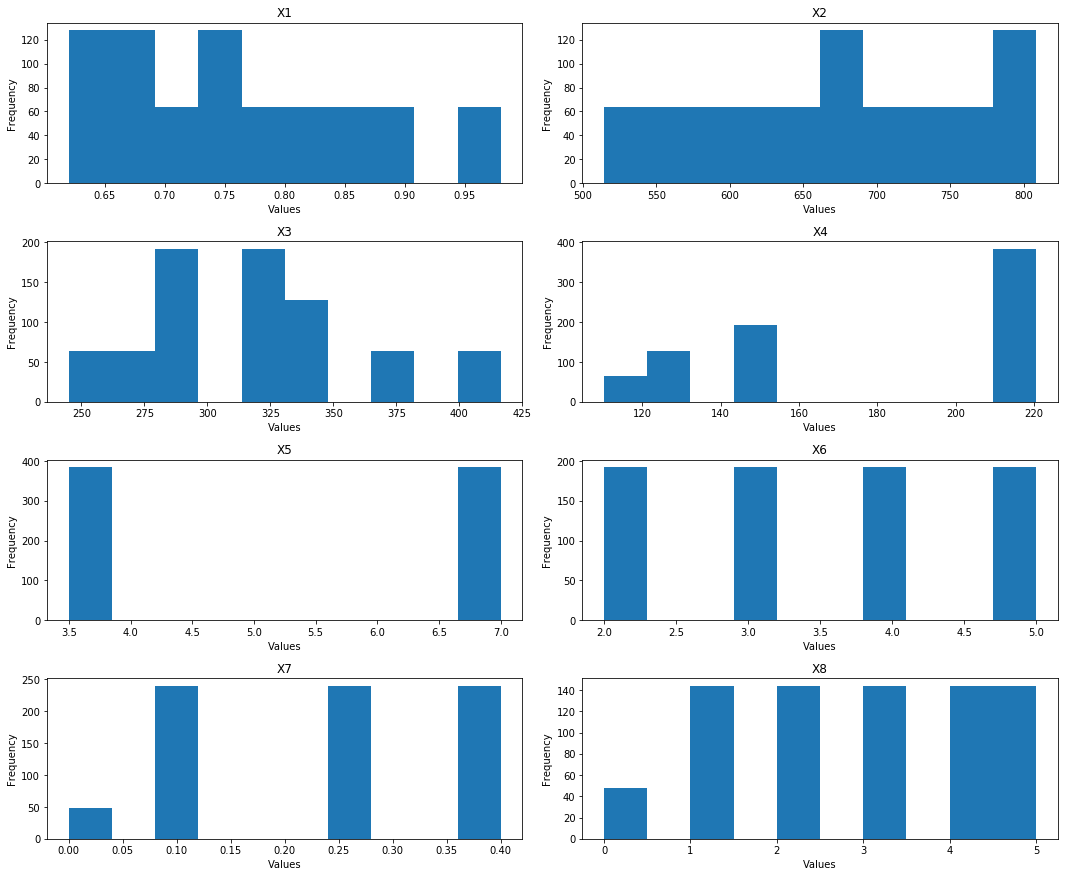

In [117]:
plotHists(X, X.columns)

We can conclude from the histograms that the data is not distributed normally, and therefore MinMaxScaler should be better.


In [118]:
lin_reg = LinearRegression(normalize=False)
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X_train)
cross_val_score(lin_reg, X_minmax, y_train, cv=4, scoring="neg_mean_squared_error").mean()

-9.549261726718548

From the result, we assume that the scaling does not have any visible difference on the training. Nevertheless, we keep the scaled dataset, because the next step is to use the regularized linear regression and the regularized models are sensitive to the scale of the input features. Regularization should prevent the model from overfitting by constraining the weights. The scikit library offers 3 choices for regularized models that limit weights by raising the cost with these terms:
- Ridge: $\alpha\frac{1}{2}\sum_{i=1}^{n} \theta^2_i$
- Lasso: $\alpha\sum_{i=1}^{n} \lvert\theta_i\rvert$
- Elastic Net: $r\alpha\sum_{i=1}^{n} \lvert\theta_i\rvert$ + $\frac{1-r}{2}\alpha\sum_{i=1}^{n} \theta^2_i$

Ridge is good default, Lasso and Elastic Net are useful when we presume that only few features are relevant. Since most of are features are relevant, that is 6 of them have Pearson's coefficient above 0.26, we use Ridge. An important hyperparameter in Ridge is $\alpha$. The higher it is, the more regularized model we're getting. To find right $\alpha$, we implement a method that prints out mean squared error for Ridge models with alpha from given minimum to given maximum.

In [119]:
def frange(x, y, jump):
  while x < y:
    yield round(x,2)
    x += jump
      
def printAlphas(min, max, step):
    vals = []
    xs = []
    for i in frange(min, max, step):
        ridge = Ridge(alpha=i)
        # xs.append(i)
        ridge_score = rep_cross_val_score(ridge, X_minmax, y_train, cv=4, 
                                          scoring="neg_mean_squared_error", reps=NUM_OF_REPS).mean()*1000
        # vals.append(-ridge_score)
        print(str(i) + " => " + str(ridge_score))
    # print(xs)
    # print(vals)
    # plt.subplot().set_title("title")
    # plt.bar(xs, vals, width=0.007)

In [120]:
printAlphas(0.01, 0.1, 0.01)

0.01 => -9565.708479943565


0.02 => -9566.266846822387


0.03 => -9567.72699036338


0.04 => -9569.870795011933


0.05 => -9572.531235946439


0.06 => -9575.5796080752


0.07 => -9578.916213030154


0.08 => -9582.463492439276


0.09 => -9586.160913536116


0.1 => -9589.961124527523


Suprisingly, regularization only makes the model worse. This means that we're already underfitting, which might be due to the lack of data or due to the linear regression not being quite right for this task. Now we have enough information to evaluate the model. The model performs best without any scaling or regularization, that is with just the basic linear regression model. We can therefore evaluate it on the testing set.


In [229]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predicts = lin_reg.predict(X_test)    
print("Mean squared error: " + str(mean_squared_error(y_test, y_predicts)))

Mean squared error: 10.514145099271623


Additionally, we might demonstrate the accuracy of the linear model visually using our previously implemented function.

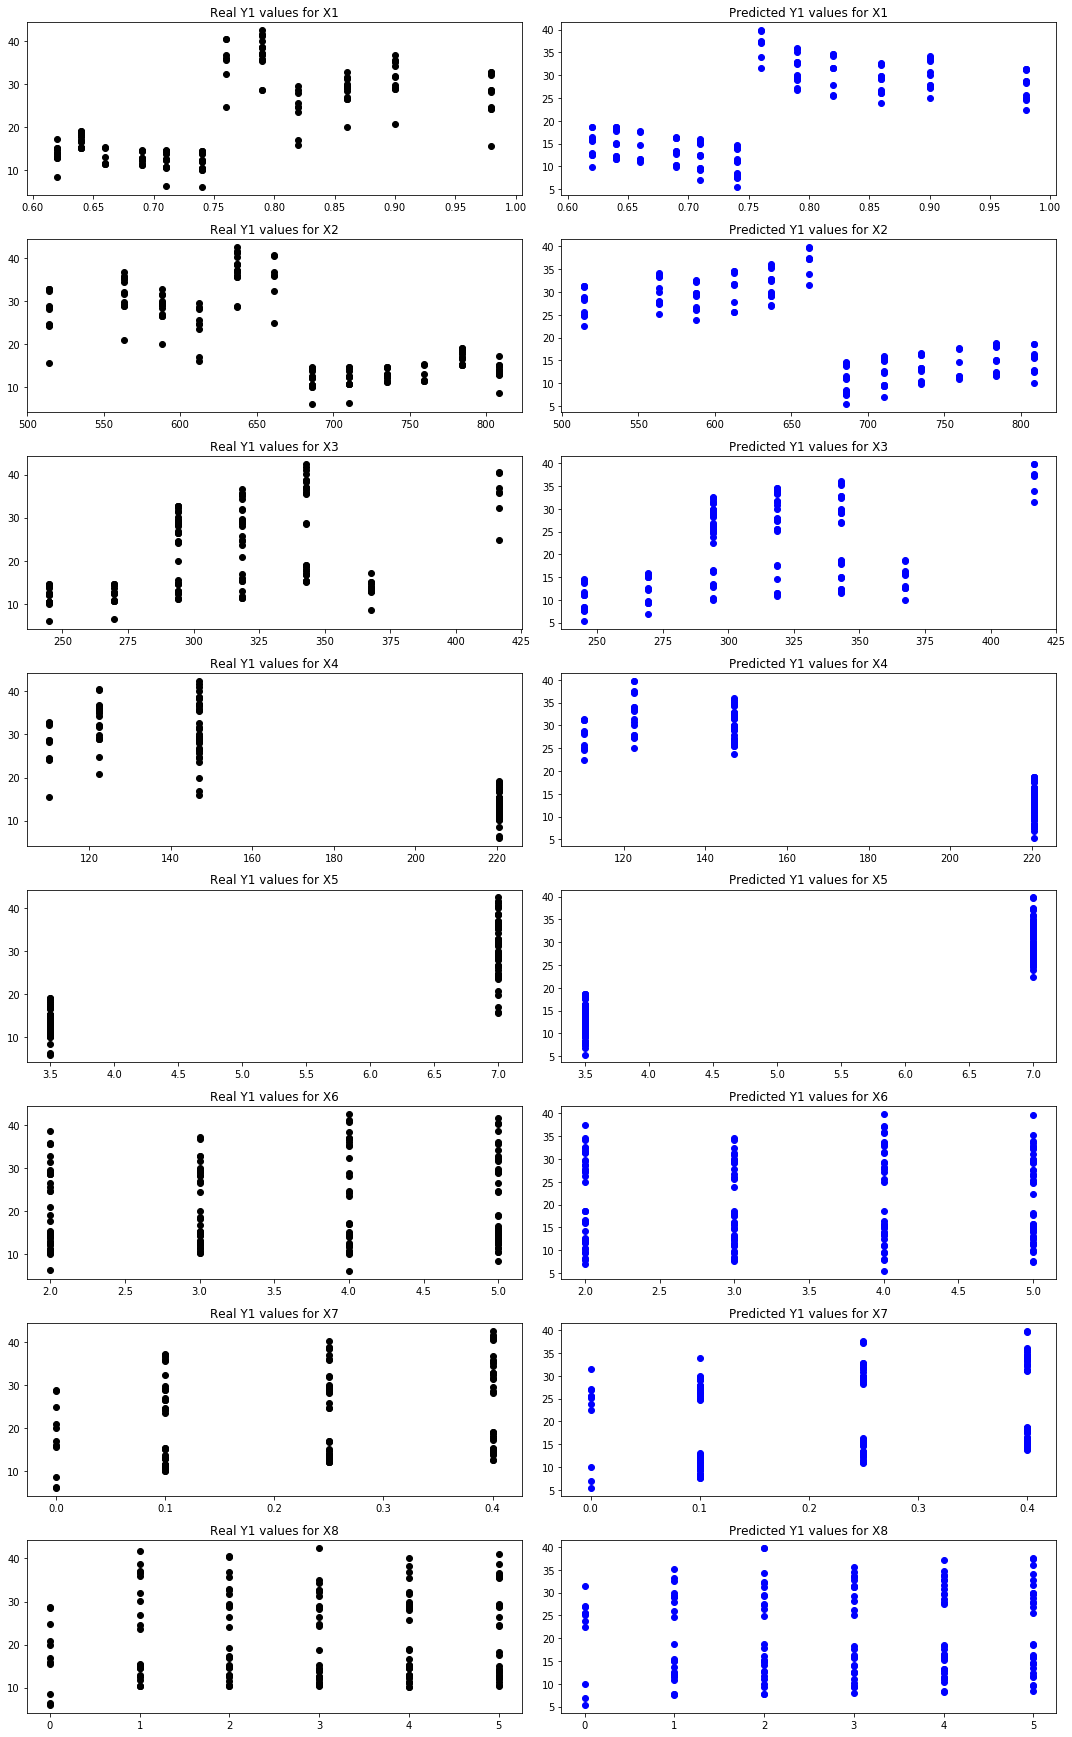

In [230]:
plotCorr(X_test, y_test, X.columns, 0, y_predicts)

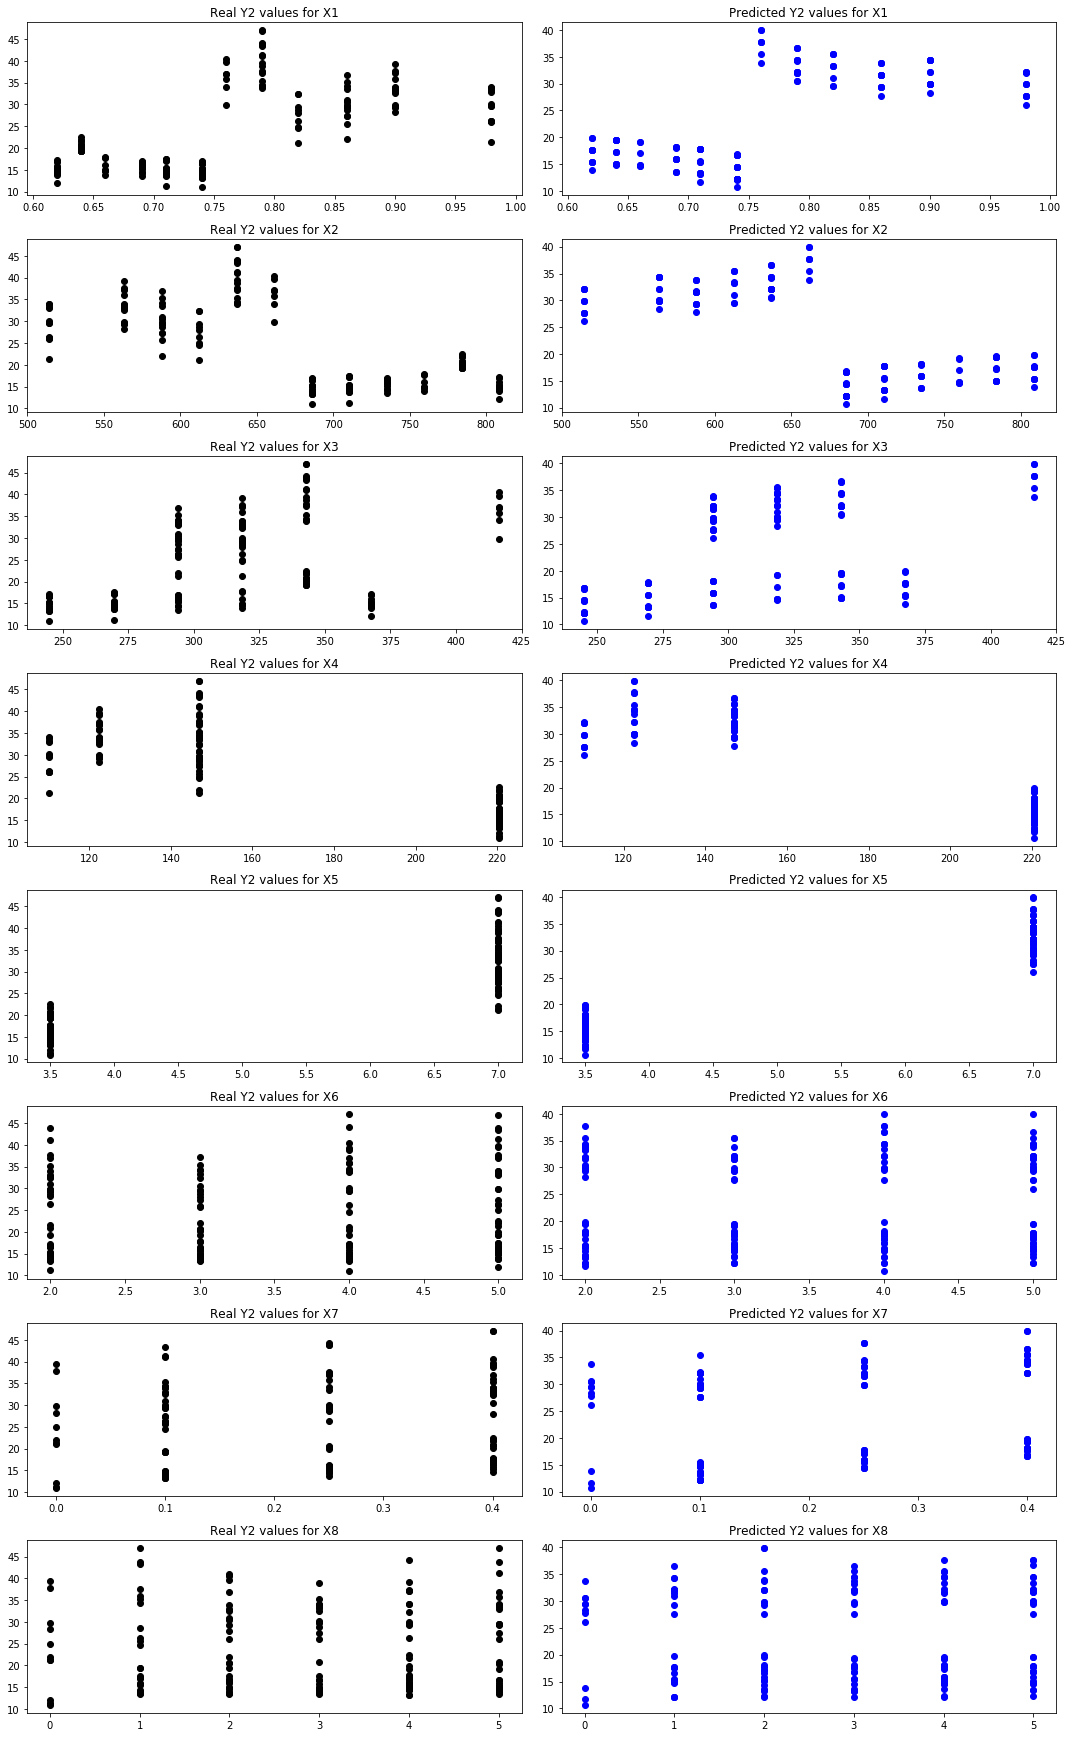

In [231]:
plotCorr(X_test, y_test, X.columns, 1, y_predicts)

#### Gradient Boosting Regression

Since the paper describes using Random Forest as the optimal model, we might use Gradient Boosting algorithm with the decision trees instead to see how it compares. To understand it, we need to first understand decision trees. 

The decision tree uses a tree-like model of decisions. Each node has a dataset feature based on which it splits the tree binary. The leaf nodes contain the class labels or regression values to which the samples are assigned to. When we want to predict a sample, we pass it through the tree and based on a sequence of binary decisions at each node, it is assigned to the the most probable result. To train the model, when splitting the tree, we're looking for a split with the lowest cost, that is a split with most homogeneous branches. The cost function is a simple squared error in the case of regression. The decision trees are great at predicting tabular data with up to 100 numerical or categorical features and, unlike linear models, they can capture non-linear interactions between features. Additionally, the data does not require an extensive preprocessing. However, the decision trees are prone to overfitting and do not account for the global optimum due to the algorithm's greediness. To prevent the overfitting, we should either prune the tree or restrict the maximum number of nodes, maximum depth or other hyperparameters.

With Random Forests, a number of decision trees is trained to the largest extent possible and there is no pruning, which means there's a low bias and a high variance. Some constant number of features, which is lower than the total number of features, is chosen at each node and the best split out of these features is applied on that node. To predict a new sample, it is run through all these trees and the final prediction is the average of predictions from the trees. This technique is used to limit both errors due to variance and errors due to bias.

Unlike Random Forests, Gradient Boosting forms the decision trees sequentially, not independently. The training is done with respect to residuals, that is measurement of difference in prediction and original outcome. This means that each time we follow these step:
1. Fit a model to the data: $F_1(x) = y$
2. Fit a model to the residuals: $h_1(x) = y - F_1(x)$
3. Create a new model: $F_2(x) = F_1(x) + h_1(x)$

When used with decision trees, each decision is of just depth 1 and is called a decision stump. Boosting algorithms are better at reducing bias than Random Forests, but the training takes longer due to their sequential natuer and they are more prone to overfitting so the stopping criteria needs to be chosen carefully.

We can look at the mean of 4-fold cross validation for both models with default values. It should be mentioned, that scikit's implementation of Gradient Boosting does not support multi-dimensional output, therefore we have to train on each column separately.


In [253]:
def get_score(X_t, y_t):
    dec_tree = ensemble.GradientBoostingRegressor()
    rand_tree = ensemble.RandomForestRegressor()
    print("Gradient Boosting Tree Regressor for Y1: " + str(cross_val_score(dec_tree, 
                                                                            X_t, 
                                                                            y_t.values[:,0], 
                                                                            cv=4, 
                                                                            scoring='neg_mean_squared_error').mean()))
    print("Random Forest Regressor for Y1: " + str(cross_val_score(rand_tree, 
                                                                    X_t, 
                                                                    y_t.values[:,0], 
                                                                    cv=4, 
                                                                    scoring='neg_mean_squared_error').mean()))
    print("Gradient Boosting Tree Regressor for Y2: " + str(cross_val_score(dec_tree, 
                                                                            X_t, 
                                                                            y_t.values[:,1], 
                                                                            cv=4, 
                                                                            scoring='neg_mean_squared_error').mean()))
    print("Random Forest Regressor for Y2: " + str(cross_val_score(rand_tree, 
                                                            X_t, 
                                                            y_t.values[:,1], 
                                                            cv=4, 
                                                            scoring='neg_mean_squared_error').mean()))


Gradient Boosting Tree Regressor for Y1: -0.2320962045521463
Random Forest Regressor for Y1: -0.3309817752631356
Gradient Boosting Tree Regressor for Y2: -2.42133650049539
Random Forest Regressor for Y2: -3.4914900632055863


In [256]:
get_score(X_train, y_train)

Gradient Boosting Tree Regressor for Y1: -0.2320962045521463
Random Forest Regressor for Y1: -0.3309817752631356
Gradient Boosting Tree Regressor for Y2: -2.42133650049539
Random Forest Regressor for Y2: -3.4914900632055863


In [255]:

get_score(X_red_train, y_red_train)

Gradient Boosting Tree Regressor for Y1: -0.2320962045521463
Random Forest Regressor for Y1: -0.3309817752631356
Gradient Boosting Tree Regressor for Y2: -2.42133650049539
Random Forest Regressor for Y2: -3.4914900632055863


Gradient Boosting outperforms Random Forests with default values. In light of what we know, this is probably due to Random Forests underfitting, that is having a high bias. Gradient Booosting actually performs worse with the reduced dataset. This might indicate that the removed features still have a slight impact on the prediction and do not behave randomly. We can further decrease the error rate by tweeking hyperparameters. Similar to Linear Regression, Gradient Boosting has learning rate as a hyperparameter. We might want to find the optimal value for it.

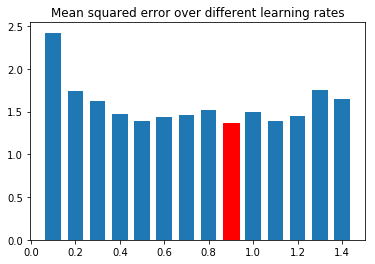

In [279]:
xs = []
lr_index = -1

def getLRPlot(X, y, target):
    xs = []
    vals = []
    for lr in frange(0.1,1.5, 0.1):
        xs.append(lr)
        vals.append(-cross_val_score(ensemble.GradientBoostingRegressor(learning_rate=lr), 
                                        X, 
                                        y.values[:,target], 
                                        cv=4, 
                                        scoring='neg_mean_squared_error').mean())
     
    plt.subplot().set_title('Mean squared error over different learning rates')       
    barlist = plt.bar(xs, vals, width=0.07)
    vals_np = np.array(vals)
    lr_index = vals.index(vals_np.min())
    barlist[lr_index].set_color('r')
    plt.show()


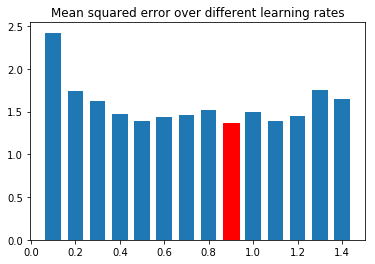

In [280]:
getLRPlot(X_train, y_train, 0)


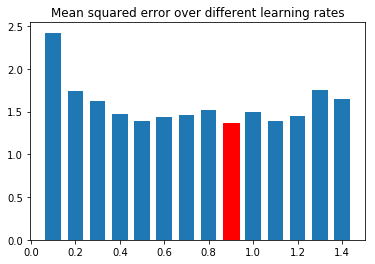

In [281]:
getLRPlot(X_train, y_train, 1)

In [282]:
lin_reg1 = ensemble.GradientBoostingRegressor(learning_rate=xs[lr_index])
lin_reg2 = ensemble.GradientBoostingRegressor(learning_rate=xs[lr_index])
lin_reg1.fit(X_train, y_train.values[:,0])
lin_reg2.fit(X_train, y_train.values[:,1])
y_predicts1 = lin_reg1.predict(X_test)
y_predicts2 = lin_reg2.predict(X_test)
mse1 = mean_squared_error(y_test.values[:,0], y_predicts1)
mse2 = mean_squared_error(y_test.values[:,1], y_predicts2)

y_pred = np.concatenate((np.expand_dims(y_predicts1, axis=1), np.expand_dims(y_predicts2, axis=1)), axis=1)

print("Mean squared error for Y1: " + str(round(mse1, 2)))
print("Mean squared error for Y2: " + str(round(mse2, 2)))

IndexError: list index out of range

Now we can demonstrate the improvement in predictions graphically, using the plotting function we implemented earlier.

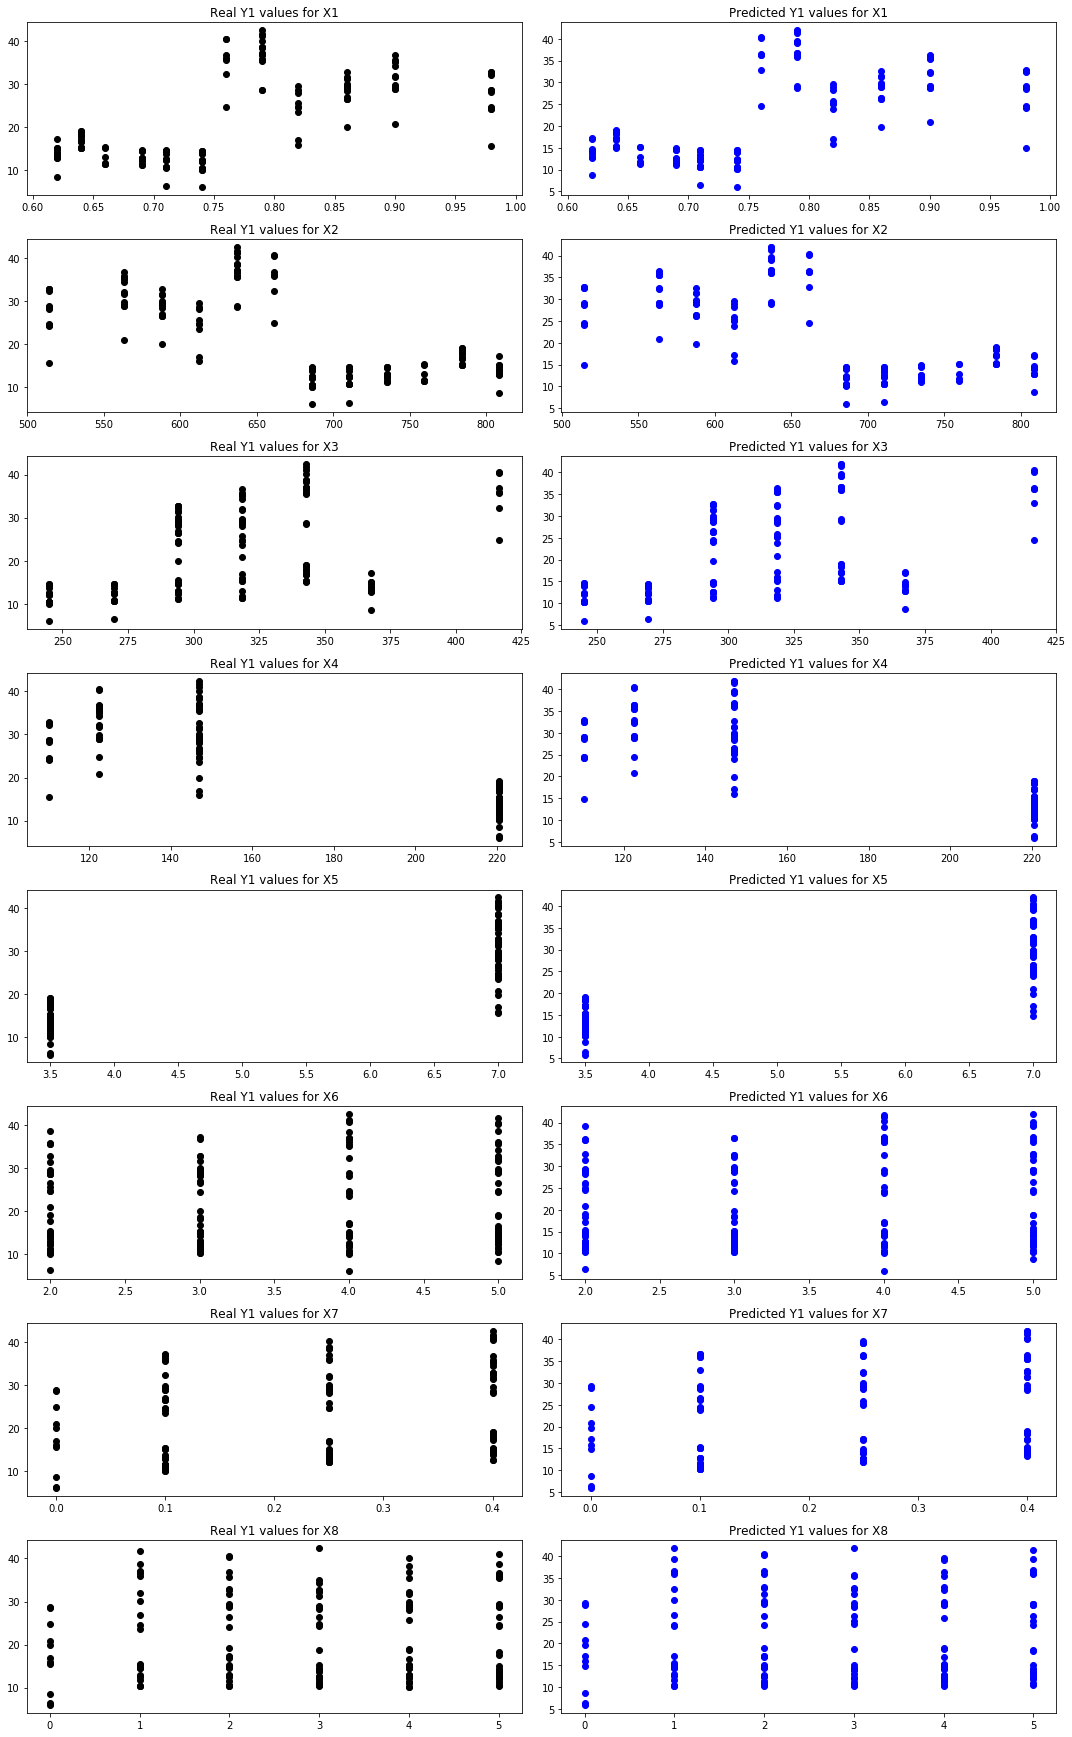

In [214]:
plotCorr(X_test, y_test, X_test.columns, 0, y_pred)

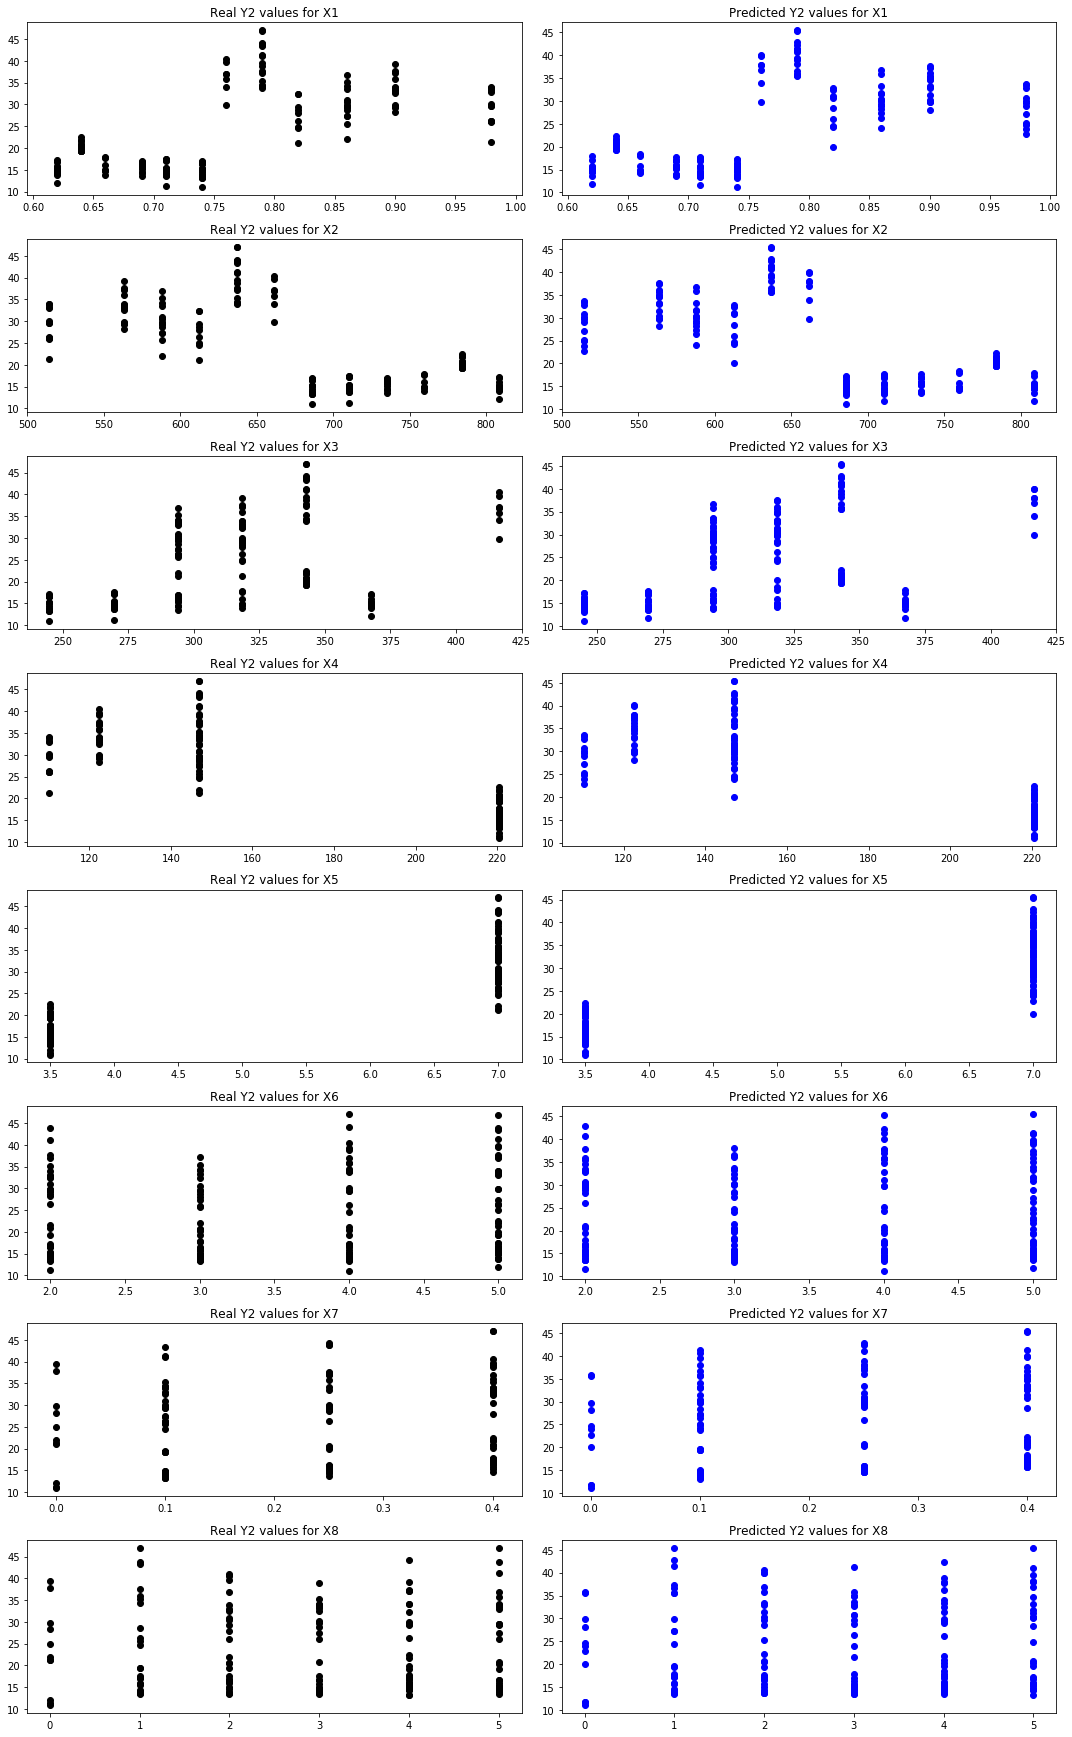

In [215]:
plotCorr(X_test, y_test, X_test.columns, 1, y_pred)

### Discussion

We have visualised the data and, after a closer look at the plots, used Pearson's correlation coefficient to determine linear releation between each feature and target columns. After finding the 2 significantly less important features, namely Orientation and Glazing area distribution, we have created an additional dataset without these 2 features to test any performance improvement. As mentioned in the report, the visualisation also demonstrates that linear techniques might not be appropriate for the data.

The dataset has been split into training and testing set, where the testing set is 20% of the overall dataset and this part is only used to evaluate the model after we're done with training. For validation, k-fold cross validation was used to ensure that the training error is a result of a model predictions, and not a lucky split. To ensure the certainty of measurements further, the cross validation is repeated 50 times.

The first trained model is Linear Regression. We have tried both MinMax scaling and Ridge regularisation and achieved no significant improvements on the model predictions. Furthermore, the reduced dataset makes no difference to the model. The reason why neither regularisation, nor the reduced dataset have any impact on the model are probably because it is already underfitting, meaning it has a high bias. This further confirms the theory that the linear model might not be the best choice.

The second model is Gradient Booting Regression. Similarly to Random Forests, it is an ensemble model in which multiple weak learners are combined to form a single strong learner. Gradient Boosting consistently outperforms Random Forests with default hyperparameters, but given the results in the paper, only outperforms Random Forests on Y1.

## Conclusion

I've done all major steps of the practical described in the report. The has been visualised, analysed and a reduced dataset has been created based on the analysis. I've trained on 2 models and I've done iterative analysis of best hyperparameters for both models. I used feature scaling, regularisation and evaluation techniques describe in the lectures. On top of that, I described in more detail, the logic behind Decision Trees, Random Forests and Gradient Boosting. According to David, Random Forests won't be covered in the lectures, and hence I've extended my knowledge of machine learning beyond the scope of the lectures in some ways. The Gradient Boosting Regressor actually outperforms Random Forests in the paper and I've explained why that might be. The hardest part of the practical was to do the research on different hyperparameters, models and especially the research done on the Decision Trees. Given more time, I'd evaluate different combinations of parameters for both models.